In [1]:
import pandas as pd
import numpy as np


In [21]:
df = pd.read_csv("titanic.csv")

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0.0,7.2500
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0.0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0.0,7.9250
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0.0,53.1000
4,0,3.0,Mr. William Henry Allen,male,35.0,0,0.0,8.0500


In [23]:
df.shape

(887, 8)

In [24]:
import seaborn as sns

<AxesSubplot:>

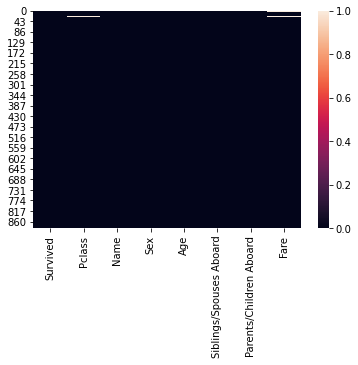

In [25]:
sns.heatmap(df.isnull())

In [26]:
df.isnull().sum()

Survived                   0
Pclass                     2
Name                       0
Sex                        3
Age                        2
Siblings/Spouses Aboard    0
Parents/Children Aboard    1
Fare                       2
dtype: int64

In [27]:
df=df.dropna()# removed rows of NaN

In [28]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,Mr. Owen Harris Braund,male,22.0,1,0.0,7.2500
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0.0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0.0,7.9250
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0.0,53.1000
4,0,3.0,Mr. William Henry Allen,male,35.0,0,0.0,8.0500


In [33]:
df = df.drop("Name", axis=1)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,male,22.0,1,0.0,7.2500
1,1,1.0,female,38.0,1,0.0,71.2833
2,1,3.0,female,26.0,0,0.0,7.9250
3,1,1.0,female,35.0,1,0.0,53.1000
4,0,3.0,male,35.0,0,0.0,8.0500


In [42]:
df=pd.get_dummies(df) # nominal variable to numeric (male/female __> 0/1 , one hotkey)

In [43]:
x=df.drop("Survived",axis=1)

In [44]:
y = df[["Survived"]]

In [45]:
x.head()


,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,3.0,22.0,1,0.0,7.2500,0,1
1,1.0,38.0,1,0.0,71.2833,1,0
2,3.0,26.0,0,0.0,7.9250,1,0
3,1.0,35.0,1,0.0,53.1000,1,0
4,3.0,35.0,0,0.0,8.0500,0,1


In [46]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [47]:
import sklearn

In [48]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=7, test_size= 0.2)

In [65]:
y_train

,Survived
591,0
75,0
749,0
12,0
718,0
...,...
588,1
511,0
546,1
205,0


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
Scaler = MinMaxScaler()

In [52]:
x_train=Scaler.fit_transform(x_train)

array([[0.5       , 0.49543161, 0.125     , ..., 0.05074862, 0.        ,
        1.        ],
       [1.        , 0.30451384, 0.        , ..., 0.01541158, 0.        ,
        1.        ],
       [1.        , 0.30451384, 0.        , ..., 0.01541158, 0.        ,
        1.        ],
       ...,
       [0.5       , 0.09995909, 0.125     , ..., 0.07173122, 0.        ,
        1.        ],
       [1.        , 0.42724669, 0.125     , ..., 0.03093714, 0.        ,
        1.        ],
       [0.        , 0.52270558, 0.        , ..., 0.0975935 , 0.        ,
        1.        ]])

In [53]:
x_test=Scaler.transform(x_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
Model = KNeighborsClassifier()

In [68]:
Model.fit(x_train,y_train.values[:,0])#error occured

KNeighborsClassifier()

In [71]:
y_predict=Model.predict(x_test)

In [70]:
y_test

,Survived
55,1
305,1
792,1
156,0
463,0
...,...
551,1
775,1
90,0
580,0


In [73]:
y_predict

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
accusco = accuracy_score(y_test,y_predict)

In [78]:
accusco

0.7329545454545454

In [80]:
confumat = confusion_matrix(y_test,y_predict)

In [88]:
confumat

array([[89, 19],
       [28, 40]], dtype=int64)

In [85]:
import matplotlib.pyplot as plt

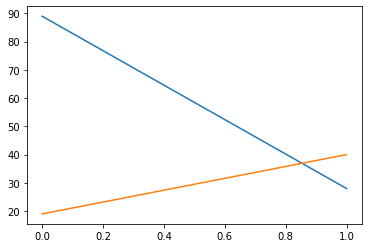

In [86]:
plt.plot(confumat)